In [69]:
# Import required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram,fcluster
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.impute import SimpleImputer
from sklearn.datasets import load_iris

### 1.Loading and Preprocessing

In [3]:
# Load Iris dataset from sklearn
data = load_iris()
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [18]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [20]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [22]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [24]:
data.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [5]:
# Create a DataFrame
df = pd.DataFrame(data.data, columns = data.feature_names)
df ['target']=data.target

In [7]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [9]:
df.target.value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

In [11]:
df.shape[0]

150

In [13]:
df.duplicated().sum()

1

In [15]:
df.drop_duplicates(inplace = True)
df.shape[0]

149

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  149 non-null    float64
 1   sepal width (cm)   149 non-null    float64
 2   petal length (cm)  149 non-null    float64
 3   petal width (cm)   149 non-null    float64
 4   target             149 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 6.4 KB


In [19]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.843624,3.059732,3.748993,1.194631,0.993289
std,0.830851,0.436342,1.767791,0.762622,0.817847
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.300000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [21]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [23]:
# Preprocessing 
imputer = SimpleImputer(strategy = 'mean')
df.iloc[:,:-1] = imputer.fit_transform(df.iloc[:,:-1])

In [25]:
#spliting the dataset to X and y
scaler = StandardScaler()
X = scaler.fit_transform(df.iloc[:,:-1])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2, random_state = 42)


print("\nData after standardization(first 5 rows):")
print(pd.DataFrame(X, columns = data.feature_names).head())


Data after standardization(first 5 rows):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.898033          1.012401          -1.333255         -1.308624
1          -1.139562         -0.137353          -1.333255         -1.308624
2          -1.381091          0.322549          -1.390014         -1.308624
3          -1.501855          0.092598          -1.276496         -1.308624
4          -1.018798          1.242352          -1.333255         -1.308624


In [27]:
X_test.shape

(30, 4)

### 2.Clustering Algorithm Implementation 

#### A) K-Means Clustering

##### Description:
K-Means is centroid-based clustering algorithm. It partitions the data into 'k' clusters such that each point belongs to the cluster with the nearest mean (centroid). The algorithm :

##### 1.Initializes k-cluster centers.
##### 2.Assigns each data point to the nearest cluster center.
##### 3.Updates the cluster centers based on current assignments.
##### 4.Repeats until convergence.

##### Why K-Means for Iris:
The Iris dataset is small, continuous, and numerical- ideal for K-Means. It forms roughly spherical clusters in feature space.

In [29]:
#elbow method to find the optimal number of clusters
inertia = []
for i in range (1,11):
    kmeans = KMeans(n_clusters = i ,n_init=10, random_state =0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
                    

C:\Users\henna\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\henna\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\henna\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\henna\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Wi

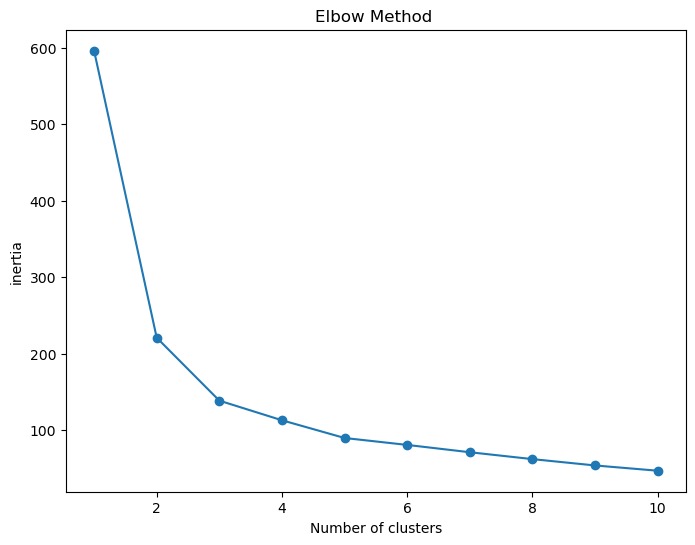

In [33]:
plt.figure(figsize=(8,6))
plt.plot(range(1,11),inertia,marker='o')
plt.title('Elbow Method ')
plt.xlabel('Number of clusters')
plt.ylabel('inertia')
plt.show()

In [44]:
#Apply K-Means Clustering
n_cluster=3
kmeans = KMeans(n_clusters =3, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

C:\Users\henna\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [37]:
#Add cluster labels to dataframe
df['KMeans_cluster'] = kmeans_labels

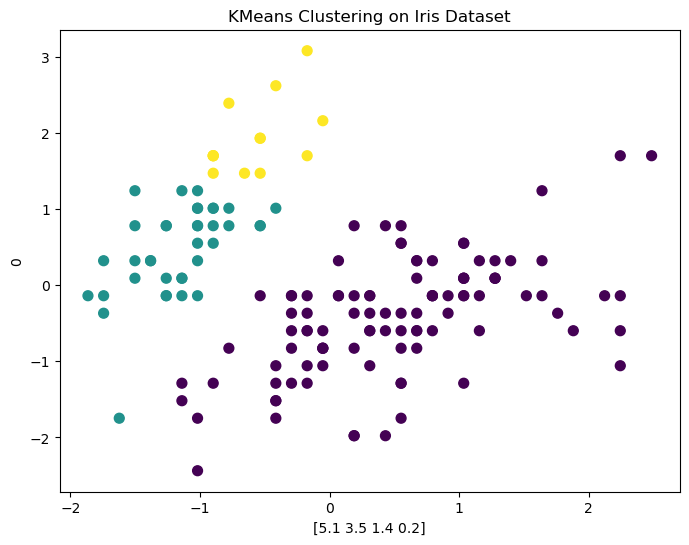

In [39]:
#Visualize K-Means Clusters
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=kmeans_labels, cmap='viridis', s=50)
plt.title("KMeans Clustering on Iris Dataset")
plt.xlabel(data.data[0])
plt.ylabel(data.target[1])
plt.show()

In [72]:
# K-Means Evaluation metrics
kmeans_silhouette = silhouette_score(X, kmeans_labels)
kmeans_davies = davies_bouldin_score(X,kmeans_labels)
kmeans_calinski = calinski_harabasz_score(X,kmeans_labels)

print("\n=== K-Means Clustering Metrics===")
print(f"Silhouette Score:{kmeans_silhouette:.4f}")
print(f"Davies Bouldin Index:{kmeans_davies:.4f}")
print(f"Calinski Harabasz Index:{kmeans_calinski:.4f}")


=== K-Means Clustering Metrics===
Silhouette Score:0.4939
Davies Bouldin Index:0.6536
Calinski Harabasz Index:148.7677


### B) Hierarchical Clustering

#### Description:
##### Hierarchical clustering builds a tree like structure (dendrogram) of clusters.
###### Two Main types:
##### -Agglomerative: starts with each point as a single cluster and merges them.
##### -Divisive: starts with one large cluster and splits recursively.

#### Why Hierarchical For Iris:
It provides insights into how clusters are formed at different distance thresholds.Useful for visualizing cluster relationships with a dendrogram.


In [42]:
# Perform Hierarchical Clustering (Agglomerative)
linked = linkage(X, method= 'ward')

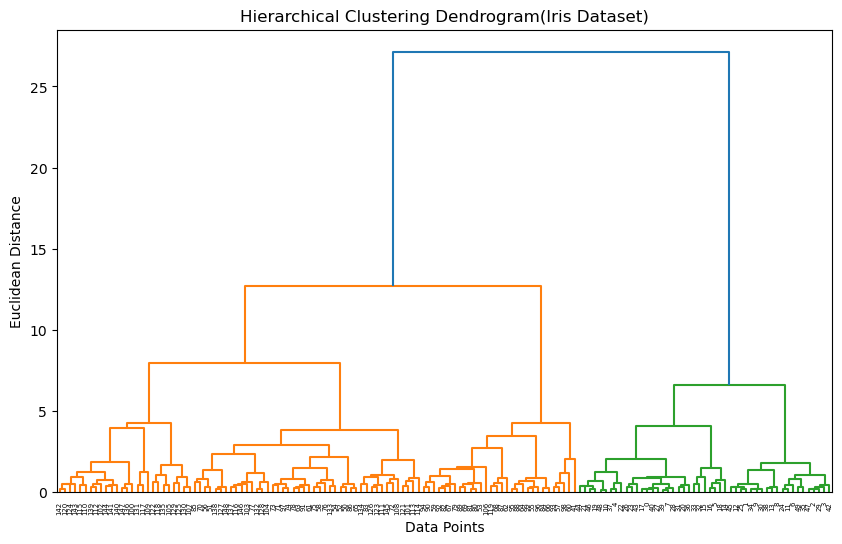

In [46]:
#Plot dendrogram
plt.figure(figsize=(10,6))
dendrogram(linked,
           orientation = 'top',
           distance_sort = 'descending',
           show_leaf_counts = True)
plt.title("Hierarchical Clustering Dendrogram(Iris Dataset)")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

In [52]:
# Cut the dendrogram to get 3 clusters(like K-Means)
hier_labels = fcluster(linked, t=3, criterion='maxclust')
df['Hierarchical_Cluster'] = hier_labels

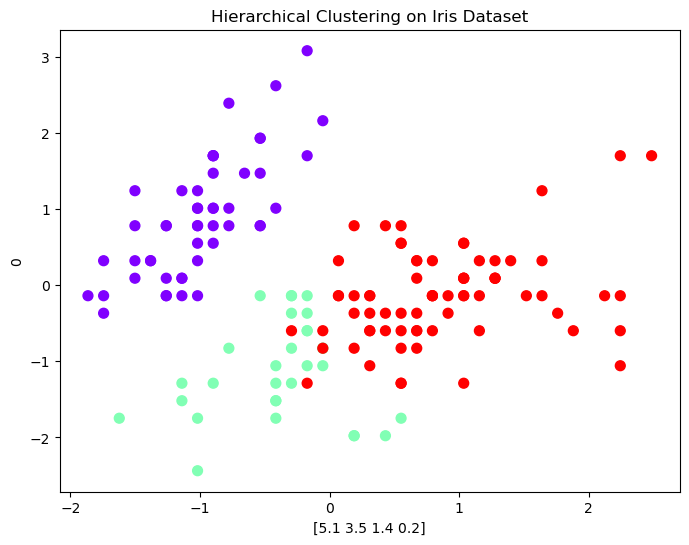

In [54]:
# Visualize Hierarchical Clusters 
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=hier_labels, cmap='rainbow', s=50)
plt.title("Hierarchical Clustering on Iris Dataset")
plt.xlabel(data.data[0])
plt.ylabel(data.target[1])
plt.show()

In [74]:
# Hierarchical Clustering Evaluation metrics
hier_silhouette = silhouette_score(X, hier_labels)
hier_davies = davies_bouldin_score(X,hier_labels)
hier_calinski = calinski_harabasz_score(X,hier_labels)

print("\n=== Hierarchical Clustering Metrics===")
print(f"Silhouette Score:{hier_silhouette:.4f}")
print(f"Davies Bouldin Index:{hier_davies:.4f}")
print(f"Calinski Harabasz Index:{hier_calinski:.4f}")


=== Hierarchical Clustering Metrics===
Silhouette Score:0.4498
Davies Bouldin Index:0.7989
Calinski Harabasz Index:222.8272


### Summary

In [67]:
print("\nCluster Summary(first 5 rows):")
print(df.head())

print("\nK-Means Cluster Counts:")
print(df['KMeans_cluster'].value_counts())

print("\nHierarchical Cluster Counts:")
print(df['Hierarchical_Cluster'].value_counts())

print("\nClustering Completed Successfully!")


Cluster Summary(first 5 rows):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  KMeans_cluster  Hierarchical_Cluster  
0       0               1                     1  
1       0               1                     1  
2       0               1                     1  
3       0               1                     1  
4       0               1                     1  

K-Means Cluster Counts:
KMeans_cluster
0    99
1    37
2    13
Name: count, dtype: int64

Hierarchical Cluster Counts:
Hierarchical_Cluster
3    70
1    49
2    30
Name: count, dtype: int64

C